# Hearthstone Ranked Simulation

### 1. The game and its ranking system
#### Overview

[Hearthstone](https://playhearthstone.com) is a digital collectible cards game created by [Blizzard Entertainment](https://www.blizzard.com), where players create their decks and compete against each other. In order to keep track of the players performance throughout the ranked season, Hearthstone has a ranking system, also called "ladder", that classifies them into Leagues (Bronze, Silver, Gold, Platinum, Diamond and Legend), and each League contains ranks that advance from 10 to 1, with the exception of Legend, that uses a more specific ranking system.

<img src='https://www.hearthstonetopdecks.com/wp-content/uploads/2020/03/ranked-rework-ranks.jpg' alt='Hearthstone New Ladder' width='840' height='473'>
<p style="text-align: center;">Hearthstone's current leagues and ranks. The idea is trying to go from an Andry Chicken, to Legendary!</p>


#### Stars
From the image above, you may have noticed those stars over the ranks. Whenever players win a match, a star is earned (times the star bonus, which we're going to discuss soon), and if they lose, a star is lost. After earning 3 stars in the same rank, the next star will be the first star for the following rank, which effectively means they advanced in the ladder. Conversely, if a player has 0 stars in a rank and loses a match, the player's rank is lowered.

#### Rank Floors
Some ranks, after being reached, work as checkpoints. This means a player's rank can no longer be lower than the highest floor reached. That's what the *Promotional* and *Non-promotional Rank Floor* in the image stand for. Also, every time a rank floor is reached by the player, a star bonus is lost.

As a rule of thumb, the rank floors are the ones divisible by 5 and Rank Legend.  
Rank Legend is sometimes referred to as *rank zero*, so also divisible by 5 (or any number whatsoever).

#### Star bonus
A player's star bonus is a multiplier that determines how many stars are going to be earned from a victory, and it can go from 1x to 11x. The star bonus is defined at the end of the ranked season and corresponds to the number of rank floors reached by the players plus an extra one based on their Matchmaking Rating (MMR). Hearthstone keeps the MMR hidden, making it difficult to know when this extra bonus will be given.

#### Win-streak
If a player wins 3 matches in a row, the next consecutive victories award double the stars that would've been won, untill the win-streak is broken by a defeat. Past Diamond 5, the win-streak bonus is disabled and cannot be earned anymore.

#### Player / deck related variables
It is worth to mention how players and their decks influence ranked play. The most important variable is *win-rate* (the % of matches won with respect to the total matches played) The higher the win-rate of the players are, the faster and more consistently they will advance in the ladder.

The factors that influence win-rate are many: player skill, matchup, current metagame, even the players psychological state influences their win-rate. With that said, we know that, realistically, the win-rate of a deck is not a single number. But as Hearthstone's metagame is generally very well established and statistics collecting apps provide very accurate average win-rates of metagame decks, it is still reasonable to just use this single win-rate number for the simulations. 

### 2. The simulation
#### Fundamentals
The simulation is based on a single object I called **Player**, and a method called  **.play_season(*tgt_rank*, *csv_file*)**. The object undergoes a loop of virtual matches untill it's rank is equal to a specified ***tgt_rank***, the argument of the method mentioned above. As the loop ends, the method returns a list (or a .csv file, if the optional argument *csv_file* = True) with information about all the matches:

* Status (Victory or Defeat?)
* Accumulated victories
* Star balance (Number of stars earned on the match)
* Current League
* Current Rank
* Current Stars
* Current Star Bonus
* Total victories so far
* Total defeats so far

With these information, it is possible to use Python's data visualization libraries (such as *matplotlib*) to gather some interesting statistics.

For more detailed information about how the simulation works, check the [readme](https://github.com/bcolombom/hsrankedsim/blob/master/README.md#how-to-use) "How to use" section.

#### Getting started
First, let's import the Python libraries we'll use throughout the simulations.

In [1]:
import matplotlib.pyplot as plt
import statistics as st

Now, the **Player** object with its methods is imported from the Python module. Then, a new player can be instantiated and have its initial values set. The arguments for the Player object are ***Name***, ***Star bonus***, ***Deck win-rate***, ***Internal Rank***, and ***Current number of stars***, respectively.

In [2]:
from hsrankedsim import Player

In [3]:
robert = Player('Robert', 3, 0.56, 50, 0)

You might be asking what ***Internal Rank*** is. To make things simpler, instead of using Leagues and Ranks, I chose to mix these two into an Internal Rank, ranging from 50(Bronze, 10) to 0(Legend). The method **.convert_internal_rank()** is an auxiliary method that converts this simpler rank to the game's actual rank.

In [4]:
robert.convert_internal_rank()

('Bronze', 10)

We're also going to use the function below, for the same purpose, but for lists of ranks and not for the Player objects.

In [5]:
def convert_rank(int_rank):
    if int_rank > 40 and int_rank <= 50:
        league = 'Bronze'
        rank = int_rank - 40
    elif int_rank > 30 and int_rank <= 40:
        league = 'Silver'
        rank = int_rank - 30
    elif int_rank > 20 and int_rank <= 30:
        league = 'Gold'
        rank = int_rank - 20
    elif int_rank > 10 and int_rank <= 20:
        league = 'Platinum'
        rank = int_rank - 10
    elif int_rank > 0 and int_rank <= 10:
        league = 'Diamond'
        rank = int_rank
    elif int_rank <= 0:
        league = 'Legend'
        rank = ''
    return f'{league} {rank}'

Now, let's make Robert play Hearthstone matches untill he reaches Platinum 5 (equivalent to the internal rank 15).

In [6]:
robert_log = robert.play_season(15)

We have stored the log list (in this case *robert_log*) that contains multiple dictionaries with all the info gathered from the matches played.

All that needs to be done now is work on a way to better present the data extracted from these simulations.

#### Extracting useful data
From the previous simulation we did with Robert, an useful thing that can be immediately discovered is the total victories, defeats and number of matches played by him untill he reached the target rank. Let's define a function to get these information and apply it to *robert_log*:

In [7]:
def get_final_results(log):
    player = log[0]['player_name']
    total_matches = log[-1]['total_matches']
    total_victories = log[-1]['total_victories']
    total_defeats = log[-1]['total_defeats']
    return {'player_name': player,
            'total_matches': total_matches,
            'total_victories': total_victories,
            'total_defeats': total_defeats
        }

get_final_results(robert_log)

{'player_name': 'Robert',
 'total_matches': 193,
 'total_victories': 119,
 'total_defeats': 74}

What if we create 10 more players, with the same starting characteristics as Robert and make them go through the same simulation?

In [8]:
tgt_rank = 15
name_list = ['John', 'Justin', 'Jefferson', 'Jia', 'Julia', 'Jacob', 'Jessica', 'Jayden', 'Judas', 'Jonas']
obj_list = [Player(name, 3, 0.56, 50, 0) for name in name_list]

log_list = [obj.play_season(tgt_rank) for obj in obj_list]
for log in log_list:
    print(get_final_results(log))

{'player_name': 'John', 'total_matches': 241, 'total_victories': 140, 'total_defeats': 101}
{'player_name': 'Justin', 'total_matches': 351, 'total_victories': 193, 'total_defeats': 158}
{'player_name': 'Jefferson', 'total_matches': 220, 'total_victories': 124, 'total_defeats': 96}
{'player_name': 'Jia', 'total_matches': 291, 'total_victories': 157, 'total_defeats': 134}
{'player_name': 'Julia', 'total_matches': 211, 'total_victories': 128, 'total_defeats': 83}
{'player_name': 'Jacob', 'total_matches': 219, 'total_victories': 121, 'total_defeats': 98}
{'player_name': 'Jessica', 'total_matches': 188, 'total_victories': 111, 'total_defeats': 77}
{'player_name': 'Jayden', 'total_matches': 355, 'total_victories': 182, 'total_defeats': 173}
{'player_name': 'Judas', 'total_matches': 200, 'total_victories': 117, 'total_defeats': 83}
{'player_name': 'Jonas', 'total_matches': 276, 'total_victories': 151, 'total_defeats': 125}


Notice that, even though the players (objects) had the same attributes at the beginning, the results change quite a bit (remember you can re-run the cell to see it varying even more.)

It is also possible to have a better visualization of how each player advanced, rank by rank, by ploting **line graphs** displaying the current player rank versus match number. For this, it is necessary to store all the ranks players have reached by destructuring their corresponding logs in *log_list*.

In [9]:
rank_history = [[match['internal_rank'] for match in match_list] for match_list in log_list]

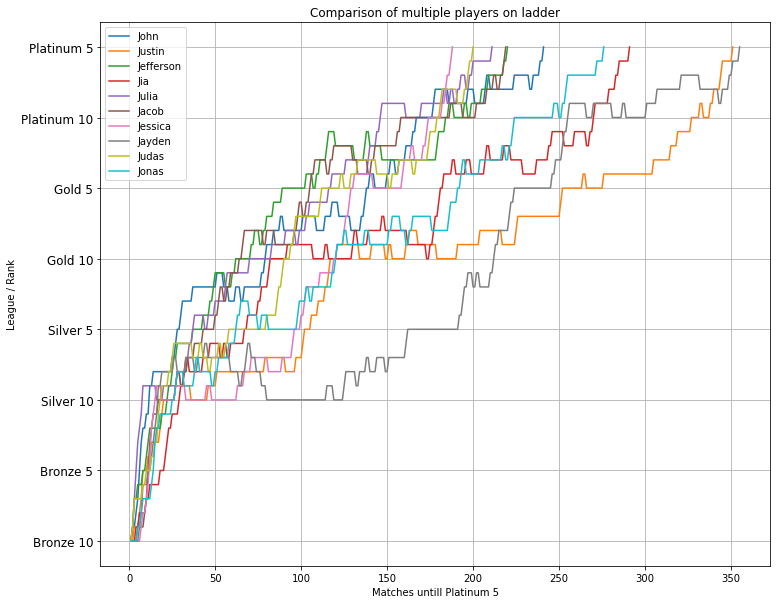

In [10]:
#Plots
fig, ax1 = plt.subplots(figsize=(12,10))
#To modify y-axis tick values from Internal Rank to normal leagues and ranks
plt.yticks(ticks=list(range(50, -1, -5)), labels=[convert_rank(i) for i in list(range(50, -1, -5))])

def plot_line_graph(axis, title, rank_history):
    i = 0
    for sublist in rank_history:
        y = sublist
        x = [i+1 for i in range(len(y))]
        lbl = name_list[i]
        axis.plot(x, y, label=lbl)
        axis.legend()
        i += 1
    axis.set_title(title)
    axis.grid()

plot_line_graph(ax1, 'Comparison of multiple players on ladder', rank_history)
ax1.invert_yaxis()
ax1.set_xlabel(f'Matches untill {convert_rank(tgt_rank)}')
ax1.set_ylabel('League / Rank')
ax1.tick_params(axis='y', which='major', labelsize=12)

Now, let's compare how different **win-rates** influence on how fast they can climb the ladder. Usually, famous meta decks range from 45% to 55% win-rate, so let's work with this range. Also, let's increase their climb up to Legend rank and set their Star Bonus as 1x.

In [11]:
tgt_rank = 0
name_list = ['William', 'Washington', 'Wendy', 'Wilbur', 'Wanda', 'Werner', 'Wilma', 'Whitney', 'Wolfgang', 'Wallace']
obj_list1 = [Player(name, 1, 0.45, 50, 0) for name in name_list] #45% win-rate
obj_list2 = [Player(name, 1, 0.5, 50, 0) for name in name_list] #50% win-rate
obj_list3 = [Player(name, 1, 0.55, 50, 0) for name in name_list] #55% win-rate

rank_history1 = [[match['internal_rank'] for match in match_list] for match_list in [obj.play_season(tgt_rank) for obj in obj_list1]] #45% win-rate
rank_history2 = [[match['internal_rank'] for match in match_list] for match_list in [obj.play_season(tgt_rank) for obj in obj_list2]] #50% win-rate
rank_history3 = [[match['internal_rank'] for match in match_list] for match_list in [obj.play_season(tgt_rank) for obj in obj_list3]] #55% win-rate

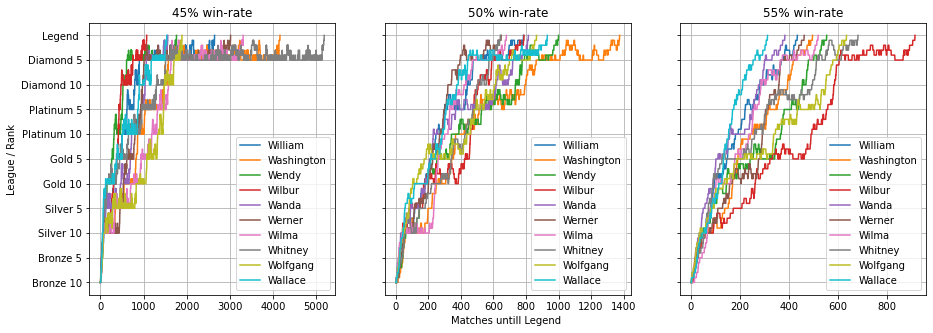

In [12]:
#Plots - Win-rate
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)
plt.setp((ax1, ax2, ax3), yticks=list(range(50, -1, -5)), yticklabels=[convert_rank(i) for i in list(range(50, -1, -5))])

plot_line_graph(ax1, '45% win-rate', rank_history1) #11x Star Bonus
plot_line_graph(ax2, '50% win-rate', rank_history2) #7x Star Bonus
plot_line_graph(ax3, '55% win-rate', rank_history3) #3x Star Bonus

ax1.set_ylabel('League / Rank')
ax1.invert_yaxis()
ax1.tick_params(axis='y', which='major', labelsize=10)
ax2.set_xlabel(f'Matches untill {convert_rank(tgt_rank)}');

The win-rate influence can be clearly seen above, as the total matches played are drastically higher with lower win-rates. Also, with lower win-rates, players are more likely to get stuck between Diamond 5 and Legend, mainly because of the absence of win-streak bonuses.

As we just did with win-rates, let's see how different **star bonuses** influence on the ladder climb, with the other arguments fixed.

In [13]:
tgt_rank = 0
name_list = ['August', 'Andrew', 'Angela', 'Austin', 'Amelia', 'Alexader', 'Anne', 'Anthony', 'Abraham', 'Adam']
obj_list1 = [Player(name, 11, 0.50, 50, 0) for name in name_list] #11x Star Bonus
obj_list2 = [Player(name, 7, 0.50, 50, 0) for name in name_list] #7x Star Bonus
obj_list3 = [Player(name, 3, 0.50, 50, 0) for name in name_list] #3x Star Bonus

rank_history1 = [[match['internal_rank'] for match in match_list] for match_list in [obj.play_season(tgt_rank) for obj in obj_list1]] #11x Star Bonus
rank_history2 = [[match['internal_rank'] for match in match_list] for match_list in [obj.play_season(tgt_rank) for obj in obj_list2]] #7x Star Bonus
rank_history3 = [[match['internal_rank'] for match in match_list] for match_list in [obj.play_season(tgt_rank) for obj in obj_list3]] #3x Star Bonus

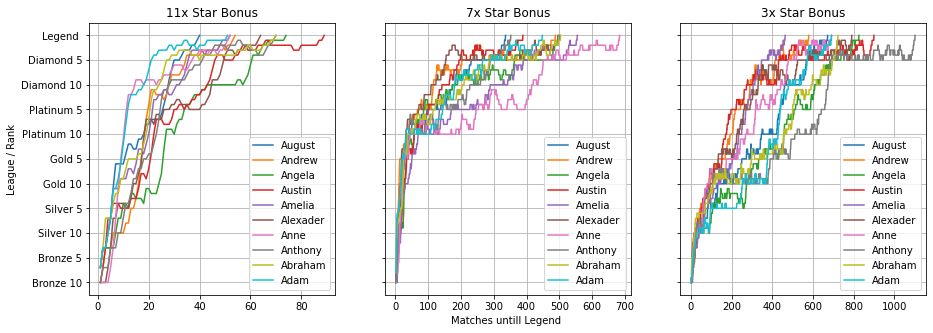

In [14]:
#Plots - Star Bonus
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)
plt.setp((ax1, ax2, ax3), yticks=list(range(50, -1, -5)), yticklabels=[convert_rank(i) for i in list(range(50, -1, -5))])

plot_line_graph(ax1, '11x Star Bonus', rank_history1) #11x Star Bonus
plot_line_graph(ax2, '7x Star Bonus', rank_history2) #7x Star Bonus
plot_line_graph(ax3, '3x Star Bonus', rank_history3) #3x Star Bonus

ax1.set_ylabel('League / Rank')
ax1.invert_yaxis()
ax1.tick_params(axis='y', which='major', labelsize=10)
ax2.set_xlabel(f'Matches untill {convert_rank(tgt_rank)}');

Star bonuses also influence greatly on the climb speed. But notably the 11x Star Bonus reduces the total number of matches player by something around 80 - 95% when compared to the other bonuses.

Another interesting visualization is a **histogram** of total matches played by multiple players. For this, let's increase even further the number of objects and create a new function that gets just the number of total matches played by the players untill they reach Legend rank.

In [15]:
def get_total_matches(log):
    total_matches = log[-1]['total_matches']
    return total_matches

In [16]:
num_players = 500
tgt_rank = 0
obj_list = [Player(i, 1, 0.56, 50, 0) for i in range(num_players)]
log_list = [obj.play_season(tgt_rank) for obj in obj_list]

total_matches_list = [get_total_matches(log) for log in log_list]

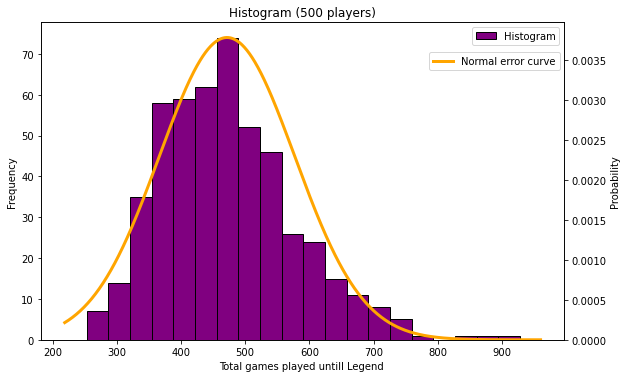

MEAN:			471.72 matches
STANDARD DEVIATION:	105.53
NUMBER OF MATCHES WITH A 95% PROBABILITY FOR THE PLAYERS TO REACH THE TARGET RANK: 646
(CONSIDERING AS A NORMAL DISTRIBUTION)


In [17]:
#Histogram plot
fig, ax1 = plt.subplots(figsize=(8,5))
fig.tight_layout()
ax1.set_title(f'Histogram ({num_players} players)')
ax1.set_xlabel(f'Total games played untill {convert_rank(tgt_rank)}')
ax1.set_ylabel('Frequency')

x1 = total_matches_list
ax1.hist(x1, bins='auto', label='Histogram', color='purple', edgecolor='black')
ax1.legend()

#Normalized error curve
ax2 = ax1.twinx()
ax2.set_ylabel('Probability')
mean = st.mean(x1)
stdev = st.stdev(x1)
nd = st.NormalDist(mu=mean, sigma=stdev)
x_min, x_max = ax2.get_xlim()
x2 = range(int(x_min), int(x_max))
norm_error_curve = [nd.pdf(i) for i in x2]
plt.plot(x2, norm_error_curve, linewidth=3, label='Normal error curve', color='orange')
ax2.set_ylim(bottom=0)
ax2.legend(loc=(0.742,0.85))
plt.show()

#Printing some statistics results
def equation(p):
    #Solve nd.cdf(x) = p, for x
    x = 0
    while x >= 0:
        if nd.cdf(x) >= p:
            return x
        x += 1

print(f'MEAN:\t\t\t{round(mean, 2)} matches')
print(f'STANDARD DEVIATION:\t{round(stdev, 2)}')
print(f'NUMBER OF MATCHES WITH A 95% PROBABILITY FOR THE PLAYERS TO REACH THE TARGET RANK: {equation(0.95)}\n(CONSIDERING AS A NORMAL DISTRIBUTION)')

It is easier to visualize from the histogram the average number of matches a player needs to play untill a determined rank and the normalized error function shows that the data is close to a Gaussian curve.  
Moreover, from the cumulative error function (not plotted here) we have an idea of the number of played matches needed by most players to reach the target rank. In this case, an estimation of the number of matches with 95% probability for the sample of players to reach the desired rank is printed above.  
Obs: Cumulative error curve could be plotted by using nd.cdf(i) on ax2 instead of nd.pdf(i).